WEEK 1

In [25]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
import joblib
from google.colab import files
uploaded = files.upload()
# Load the dataset (update the filename accordingly)
df = pd.read_csv("irrigation_machine.csv")

Saving irrigation_machine.csv to irrigation_machine (1).csv


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
import joblib
from google.colab import files
df = pd.read_csv("irrigation_machine.csv")
df.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [34]:
df.columns

Index(['Unnamed: 0', 'sensor_0', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'parcel_0', 'parcel_1', 'parcel_2'],
      dtype='object')

In [35]:
df.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [36]:
df.describe()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,999.500000,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,577.494589,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,499.750000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,999.500000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,1499.250000,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,1999.000000,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000


In [37]:
a = df.iloc[:, 0:20]   # This gives you columns 0 to 19 (sensor_0 to sensor_19)


b = df.iloc[:, 21:] # Select only the parcel columns

In [38]:
a.sample(10)

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18
1196,1196,2.0,2.0,4.0,1.0,1.0,2.0,3.0,5.0,1.0,3.0,3.0,1.0,7.0,2.0,1.0,0.0,3.0,1.0,0.0
959,959,3.0,2.0,1.0,2.0,3.0,1.0,3.0,7.0,3.0,3.0,1.0,2.0,3.0,2.0,2.0,4.0,1.0,1.0,3.0
1730,1730,5.0,2.0,1.0,3.0,5.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,0.0,5.0,3.0,4.0
955,955,3.0,0.0,4.0,0.0,2.0,0.0,6.0,2.0,1.0,0.0,6.0,6.0,3.0,1.0,2.0,2.0,0.0,1.0,0.0
1268,1268,3.0,3.0,3.0,3.0,3.0,0.0,3.0,4.0,3.0,2.0,2.0,3.0,3.0,1.0,0.0,5.0,1.0,2.0,2.0
233,233,0.0,3.0,0.0,4.0,3.0,0.0,2.0,3.0,0.0,3.0,1.0,2.0,2.0,6.0,7.0,1.0,1.0,0.0,1.0
628,628,1.0,1.0,2.0,4.0,1.0,1.0,6.0,3.0,1.0,1.0,3.0,6.0,4.0,1.0,2.0,0.0,1.0,2.0,2.0
496,496,1.0,3.0,0.0,8.0,3.0,1.0,0.0,7.0,2.0,2.0,1.0,1.0,6.0,3.0,9.0,0.0,3.0,0.0,7.0
1230,1230,2.0,0.0,3.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,2.0,0.0
490,490,0.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,4.0,4.0,4.0,1.0,0.0,1.0,0.0,2.0


In [39]:
b.sample(10)

,parcel_0,parcel_1,parcel_2
1525,0,0,0
1709,1,1,1
72,1,0,0
292,0,0,0
1568,0,0,0
1917,1,1,0
1228,0,1,0
1544,1,1,1
1173,1,1,0
533,1,1,1


In [40]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [41]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   parcel_0  2000 non-null   int64
 1   parcel_1  2000 non-null   int64
 2   parcel_2  2000 non-null   int64
dtypes: int64(3)
memory usage: 47.0 KB


In [42]:
a.shape

(2000, 20)

In [43]:
b.shape

(2000, 3)

WEEK 2

In [46]:
scaler = MinMaxScaler()
a_scaled = scaler.fit_transform(a)
a_scaled

array([[0.00000000e+00, 1.25000000e-01, 2.22222222e-01, ...,
        2.00000000e-01, 9.09090909e-02, 9.00000000e-01],
       [5.00250125e-04, 6.25000000e-01, 1.11111111e-01, ...,
        2.00000000e-01, 1.81818182e-01, 2.00000000e-01],
       [1.00050025e-03, 3.75000000e-01, 1.11111111e-01, ...,
        0.00000000e+00, 2.72727273e-01, 1.00000000e-01],
       ...,
       [9.98999500e-01, 1.25000000e-01, 3.33333333e-01, ...,
        4.00000000e-01, 3.63636364e-01, 1.00000000e-01],
       [9.99499750e-01, 2.50000000e-01, 1.11111111e-01, ...,
        2.00000000e-01, 0.00000000e+00, 3.00000000e-01],
       [1.00000000e+00, 0.00000000e+00, 1.11111111e-01, ...,
        0.00000000e+00, 4.54545455e-01, 2.00000000e-01]])

In [45]:
a_train, a_test, b_train, b_test = train_test_split(a_scaled, b, test_size=0.2, random_state=42)

In [44]:
a_train.shape, a_test.shape, b_train.shape, b_test.shape

((1600, 20), (400, 20), (1600, 3), (400, 3))

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)
model = MultiOutputClassifier(rf)
model.fit(a_train, b_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=4,
                                                       n_estimators=200,
                                                       random_state=42))

In [32]:
b_pred = model.predict(a_test)
print("Classification Report:")
print(classification_report(b_test, b_pred, target_names=b.columns))

Classification Report:
              precision    recall  f1-score   support

    parcel_0       0.85      0.93      0.89       256
    parcel_1       0.92      0.97      0.94       304
    parcel_2       0.91      0.49      0.64        87

   micro avg       0.89      0.89      0.89       647
   macro avg       0.89      0.80      0.83       647
weighted avg       0.89      0.89      0.88       647
 samples avg       0.82      0.79      0.79       647



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
print(df[['parcel_0', 'parcel_1', 'parcel_2']].sum())

parcel_0    1271
parcel_1    1461
parcel_2     424
dtype: int64


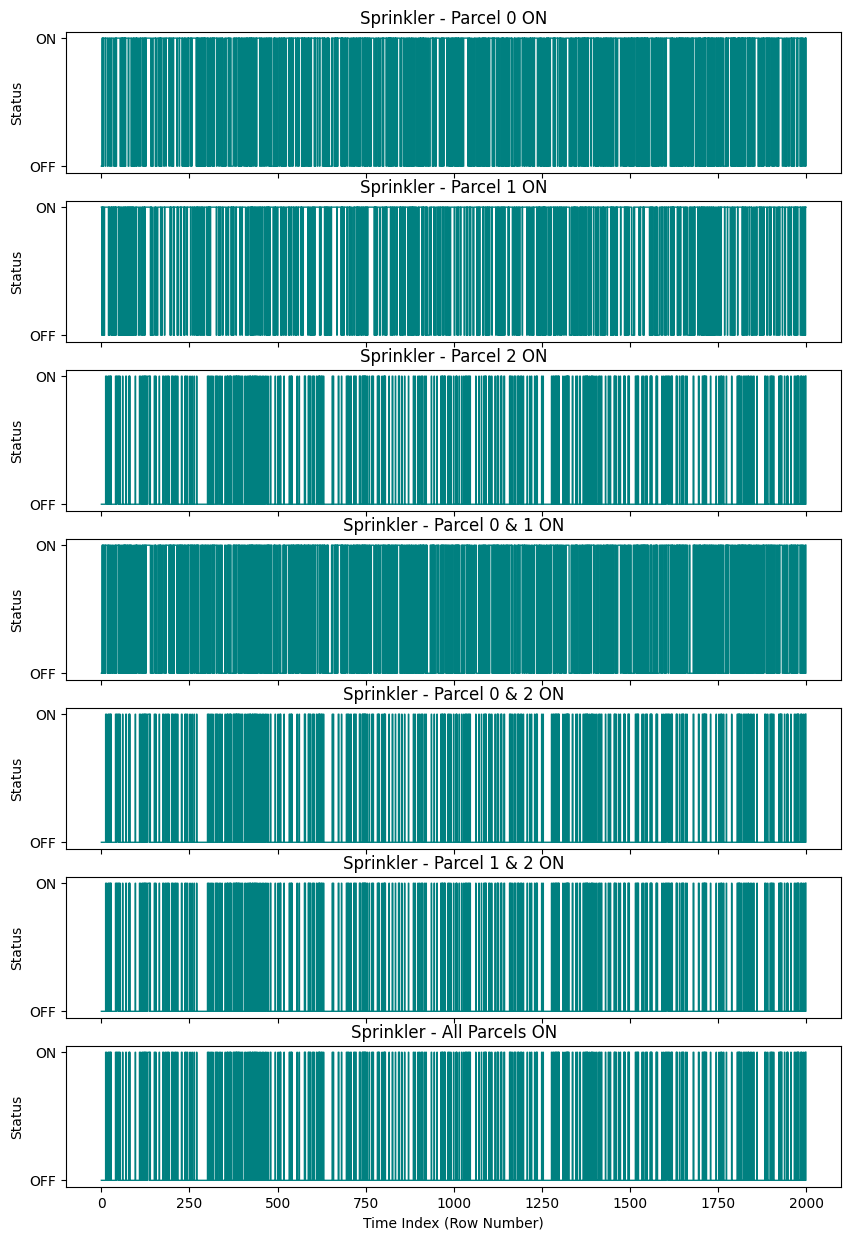

In [30]:
import matplotlib.pyplot as plt
conditions = {
    "Parcel 0 ON": df['parcel_0'],
    "Parcel 1 ON": df['parcel_1'],
    "Parcel 2 ON": df['parcel_2'],
    "Parcel 0 & 1 ON": df['parcel_0'] & df['parcel_1'],
    "Parcel 0 & 2 ON": df['parcel_0'] & df['parcel_2'],
    "Parcel 1 & 2 ON": df['parcel_1'] & df['parcel_2'],
    "All Parcels ON": df['parcel_0'] & df['parcel_1'] & df['parcel_2'],
}

fig, axs = plt.subplots(nrows=len(conditions), figsize=(10,15), sharex=True)

for ax, (title, condition) in zip(axs, conditions.items()):
    ax.step(df.index, condition.astype(int), where='post', linewidth=1, color='teal')
    ax.set_title(f"Sprinkler - {title}")
    ax.set_ylabel("Status")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['OFF', 'ON'])



axs[-1].set_xlabel("Time Index (Row Number)")
plt.show()

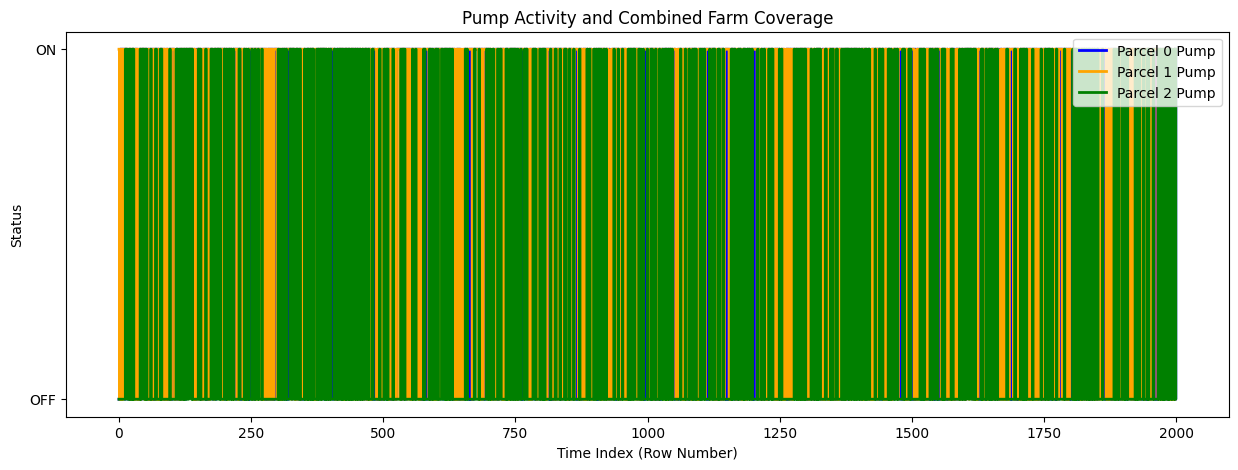

In [29]:
any_pump_on = (df['parcel_0'] == 1) | (df['parcel_1'] == 1) | (df['parcel_2'] == 1)

plt.figure(figsize=(15, 5))

plt.step(df.index, df['parcel_0'], where='post', linewidth=2, label='Parcel 0 Pump', color='blue')
plt.step(df.index, df['parcel_1'], where='post', linewidth=2, label='Parcel 1 Pump', color='orange')
plt.step(df.index, df['parcel_2'], where='post', linewidth=2, label='Parcel 2 Pump', color='green')

plt.title("Pump Activity and Combined Farm Coverage")
plt.xlabel("Time Index (Row Number)")
plt.ylabel("Status")
plt.yticks([0, 1], ['OFF', 'ON'])
plt.legend(loc='upper right')
plt.show()

In [47]:
import joblib
from sklearn.pipeline import Pipeline
from google.colab import files
uploaded = files.upload()
joblib.dump(model, "Farm_Irrigation_System.pkl")

Saving Farm_Irrigation_System.pkl to Farm_Irrigation_System (1).pkl


['Farm_Irrigation_System.pkl']

In [ ]:
import streamlit as st
import numpy as np
import joblib

# Load the trained model
model = joblib.load("Farm_Irrigation_System.pkl")

st.title("Smart Sprinkler System")
st.subheader("Enter scaled sensor values (0 to 1) to predict sprinkler status")

# Collect sensor inputs (scaled values)
sensor_values = []
for i in range(20):
    val = st.slider(f"Sensor {i}", min_value=0.0, max_value=1.0, value=0.5, step=0.01)
    sensor_values.append(val)

# Predict button
if st.button("Predict Sprinklers"):
    input_array = np.array(sensor_values).reshape(1, -1)
    prediction = model.predict(input_array)[0]

    st.markdown("### Prediction:")
    for i, status in enumerate(prediction):
        st.write(f"Sprinkler {i} (parcel_{i}): {'ON' if status == 1 else 'OFF'}")

In [49]:
!pip install -q streamlit pyngrok joblib numpy
%%writefile app.py
import streamlit as st
import numpy as np
import joblib
import os
if os.path.exists("Farm_Irrigation_System.pkl"):
    model = joblib.load("Farm_Irrigation_System.pkl")
else:
    st.error("Model file not found! Please upload Farm_Irrigation_System.pkl")

st.title("Smart Sprinkler System")
st.subheader("Enter scaled sensor values (0 to 1) to predict sprinkler status")
sensor_values = []
for i in range(20):
    val = st.slider(f"Sensor {i}", min_value=0.0, max_value=1.0, value=0.5, step=0.01)
    sensor_values.append(val)
if st.button("Predict Sprinklers"):
    input_array = np.array(sensor_values).reshape(1, -1)
    prediction = model.predict(input_array)[0]

    st.markdown("### Prediction:")
    for i, status in enumerate(prediction):
        st.write(f"Sprinkler {i} (parcel_{i}): {'ON' if status == 1 else 'OFF'}")
from pyngrok import ngrok
ngrok.set_auth_token("30jT3pA3vtmMM2bMMP99NAtES4L_3aJmmdPNEgMrzJ6pWeoy1")
!streamlit run app.py &
public_url = ngrok.connect(8502)
print(f"Your app is running at: {public_url}")


UsageError: Line magic function `%%writefile` not found.


In [ ]:
with open("app.py", "w") as f:
    f.write("""
import streamlit as st
import numpy as np
import joblib
import os

# Load the trained model
if os.path.exists("Farm_Irrigation_System.pkl"):
    model = joblib.load("Farm_Irrigation_System.pkl")
else:
    st.error("Model file not found! Please upload Farm_Irrigation_System.pkl")

st.title("Smart Sprinkler System")
st.subheader("Enter scaled sensor values (0 to 1) to predict sprinkler status")

# Collect sensor inputs (scaled values)
sensor_values = []
for i in range(20):
    val = st.slider(f"Sensor {i}", min_value=0.0, max_value=1.0, value=0.5, step=0.01)
    sensor_values.append(val)

# Predict button
if st.button("Predict Sprinklers"):
    input_array = np.array(sensor_values).reshape(1, -1)
    prediction = model.predict(input_array)[0]

    st.markdown("### Prediction:")
    for i, status in enumerate(prediction):
        st.write(f"Sprinkler {i} (parcel_{i}): {'ON' if status == 1 else 'OFF'}")
""")
from pyngrok import ngrok
ngrok.set_auth_token("30jT3pA3vtmMM2bMMP99NAtES4L_3aJmmdPNEgMrzJ6pWeoy1")
!streamlit run app.py &
public_url = ngrok.connect(8502)
print(f"Your app is running at: {public_url}")





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.173.85:8501

